In [303]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate sample data
pd.set_option('display.max_columns', None)

#Loading the dataset
df = pd.read_csv(r"D:\Intern_ship_projs\int_pj.csv")

print('Shape of the dataset:', df.shape)
df.head()

Shape of the dataset: (3407, 15)


,Person ID,Customer name,Date_Time,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1.0,Emiko Fujimoto,01-Nov-24,Male,28.0,Sales Representative,7.0,5,31.0,9,TV,140/90,86,3001,Sleep Apnea
1,2.0,Airi Watanabe,16-Nov-24,Female,59.0,Nurse,9.0,9,74.0,3,Overweight,give,69,7001,Sleep Apnea
2,3.0,Sora Hayashi,01-Nov-24,Female,45.0,Teacher,6.0,6,45.0,4,Overweight,135/90,65,6000,mind
3,4.0,Kenji Okada,17-Oct-24,Male,39.0,Lawyer,8.0,8,60.0,5,Normal,130/85,67,8000,NaN
4,5.0,Kenji Abe,21-Apr-24,Male,31.0,Doctor,8.0,8,75.0,6,Normal,120/80,70,8000,NaN


In [304]:
print('\nMissing values in each column:')
print(df.isnull().sum())# Checking for missing values in each column befor filling


Missing values in each column:
Person ID                    33
Customer name                 0
Date_Time                     0
Gender                        0
Age                          12
Occupation                    0
Sleep Duration               12
Quality of Sleep              0
Physical Activity Level      11
Stress Level                  0
BMI Category                  0
Blood Pressure                0
Heart Rate                    0
Daily Steps                   0
Sleep Disorder             1882
dtype: int64


In [305]:
#df['Age'].fillna({'Age' : df['Age'].median()}, inplace=True)
#Filling all the missing values in all the columns with 0


df['Age'] = df['Age'].fillna(0)
df['Sleep Duration'] = df['Sleep Duration'].fillna(0)
df['Physical Activity Level'] = df['Physical Activity Level'].fillna(0)
df['Person ID'] = df['Person ID'].fillna(0)


# Checking for missing values in each column (after filling)
print(df.isnull().sum())

Person ID                     0
Customer name                 0
Date_Time                     0
Gender                        0
Age                           0
Occupation                    0
Sleep Duration                0
Quality of Sleep              0
Physical Activity Level       0
Stress Level                  0
BMI Category                  0
Blood Pressure                0
Heart Rate                    0
Daily Steps                   0
Sleep Disorder             1882
dtype: int64


In [306]:
#Filling the NaNs to a specific column
mode_values = {col : df[col].mode().iloc[0] for col in df.select_dtypes(include=['object','category']).columns}
df.fillna(mode_values, inplace=True)

#In the above we have filled the all the Row's value which was have 'None' as the value to 0 in 'Sleep Disorder' Column
print(df.isna().sum()  )#Checking the result 

Person ID                  0
Customer name              0
Date_Time                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64


In [307]:
#Converting the Timestamp to Datetime format
df['Date_Time'] = pd.to_datetime(df['Date_Time'],format = 'mixed')
df

,Person ID,Customer name,Date_Time,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1.0,Emiko Fujimoto,2024-11-01,Male,28.0,Sales Representative,7.0,5,31.0,9,TV,140/90,86,3001,Sleep Apnea
1,2.0,Airi Watanabe,2024-11-16,Female,59.0,Nurse,9.0,9,74.0,3,Overweight,give,69,7001,Sleep Apnea
2,3.0,Sora Hayashi,2024-11-01,Female,45.0,Teacher,6.0,6,45.0,4,Overweight,135/90,65,6000,mind
3,4.0,Kenji Okada,2024-10-17,Male,39.0,Lawyer,8.0,8,60.0,5,Normal,130/85,67,8000,Insomnia
4,5.0,Kenji Abe,2024-04-21,Male,31.0,Doctor,8.0,8,75.0,6,Normal,120/80,70,8000,Insomnia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3402,0.0,Hina Okada,2024-03-22,Female,36.0,Accountant,7.0,9,60.0,4,Normal,115/75,68,6999,Insomnia
3403,0.0,Daichi Mori,2024-12-08,Female,38.0,Accountant,7.0,9,60.0,5,Normal,115/75,68,7001,Insomnia
3404,0.0,Sora Ishida,2024-06-20,Female,38.0,Accountant,7.0,8,60.0,3,sometimes,115/75,68,6999,Insomnia
3405,0.0,Airi Hayashi,2024-04-29,care,35.0,Accountant,7.0,8,60.0,4,Normal,115/75,67,6999,Insomnia


In [308]:
#Checking the duplicates valuse
#df[df['Person ID'].duplicated(keep=False)].sort_values('Person ID')
df['Person ID'].duplicated().sum()

#Removing the duplicate values
df = df.drop_duplicates('Person ID')
df['Person ID'].duplicated().sum()

0

In [309]:
#Renaming the Inconivenient Row Values
Occupation = {'Eng' : 'Engineer','Accnt' : 'Accountant'}
df

,Person ID,Customer name,Date_Time,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1.0,Emiko Fujimoto,2024-11-01,Male,28.0,Sales Representative,7.0,5,31.0,9,TV,140/90,86,3001,Sleep Apnea
1,2.0,Airi Watanabe,2024-11-16,Female,59.0,Nurse,9.0,9,74.0,3,Overweight,give,69,7001,Sleep Apnea
2,3.0,Sora Hayashi,2024-11-01,Female,45.0,Teacher,6.0,6,45.0,4,Overweight,135/90,65,6000,mind
3,4.0,Kenji Okada,2024-10-17,Male,39.0,Lawyer,8.0,8,60.0,5,Normal,130/85,67,8000,Insomnia
4,5.0,Kenji Abe,2024-04-21,Male,31.0,Doctor,8.0,8,75.0,6,Normal,120/80,70,8000,Insomnia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,372.0,Naomi Tanaka,2024-01-15,Female,45.0,Teacher,7.0,7,45.0,4,Overweight,135/90,65,6000,Insomnia
372,373.0,Hina Takahashi,2024-05-28,Female,52.0,positive,6.0,6,44.0,7,Overweight,130/85,72,6000,Insomnia
373,374.0,Takumi Tanaka,2024-11-23,Male,29.0,enter,8.0,7,74.0,6,Normal,120/80,70,7999,Insomnia
939,375.0,Naomi Mori,2024-11-16,Female,37.0,Nurse,8.0,7,60.0,4,Normal Weight,120/80,69,7999,Insomnia


In [310]:
#Take minimum value of Blood Pressure column
min_blood_preasure = df['Blood Pressure'].min()
print('min_blood_preasure:',min_blood_preasure)

#Take maximum value of Blood Pressure column
max_blood_preasure = df['Blood Pressure'].max()
print('max_blood_preasure:',max_blood_preasure)

min_blood_preasure: 115/75
max_blood_preasure: use


In [311]:
#Finding the Mean,Median,Mode and Standard Deviation value of Age
age_mean = df['Age'].mean()
print('Mean value of Age:', age_mean)

age_median = df['Age'].median()
print('Median value of Age:', age_median)

age_mode = df['Age'].mode()[0]
print('Mode value of Age:', age_mode)

age_std = df['Age'].std()
print('Standard Deviation value of Age:', age_std)

Mean value of Age: 41.27925531914894
Median value of Age: 41.0
Mode value of Age: 44.0
Standard Deviation value of Age: 8.78326866893176


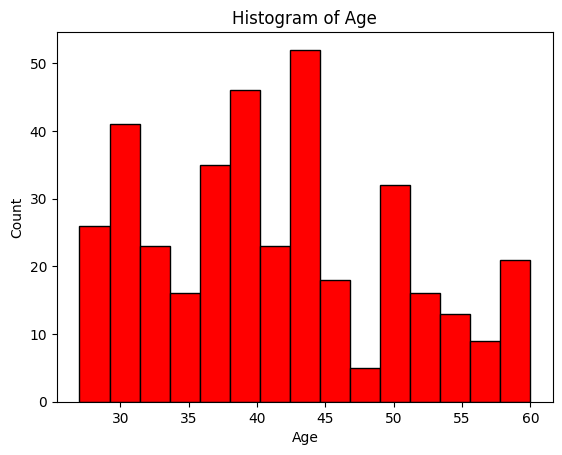

In [312]:
#Ploting the Histogram Graph for Age Column
plt.hist(df['Age'], bins=15, color='red', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of Age')
plt.show()

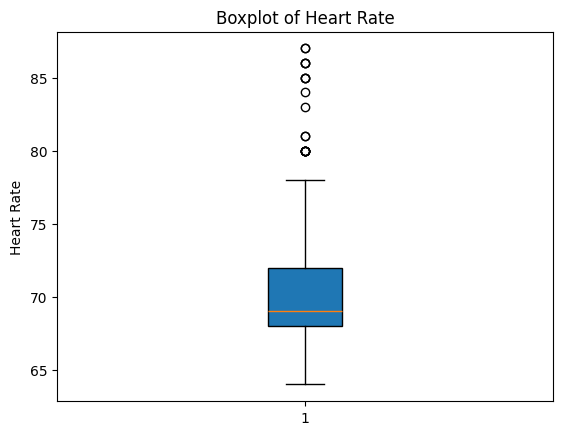

In [313]:
plt.boxplot(df['Heart Rate'], vert=True, patch_artist=True)
plt.title('Boxplot of Heart Rate')
plt.ylabel('Heart Rate')
plt.show()

In [ ]:
#(df['Gender'] == 'Male').sum()

#(df['Gender'] == 'Female').sum()

#Counting the number of Males 
df['Gender'].value_counts().get('Male',0)

185

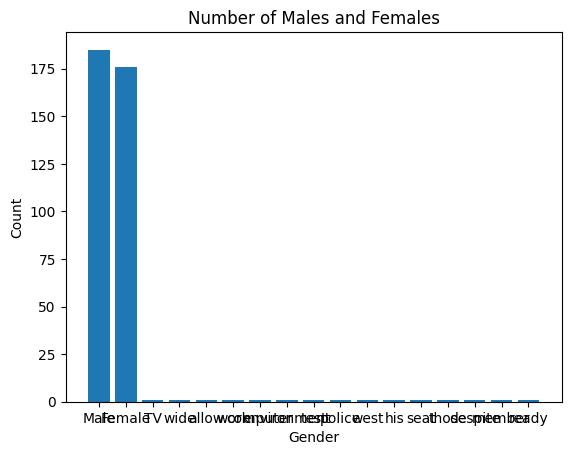

In [ ]:
#Counting the number of Females
df['Gender'].value_counts().get('Female',0)

plt.bar(df['Gender'].value_counts().index, df['Gender'].value_counts())
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Number of Males and Females')
plt.show()